**Ryan Shearer         24695394**

***Introduction***

This report focuses on the simulation and analysis of random walks and self-avoiding walks in two and three dimensions. The primary objective is to investigate the scaling behavior of these walks and compare different methodologies for generating them.


The log-log plots for $ \langle R^2_N \rangle $ vs $ N $ and $ \langle R_N \rangle $ vs $ N $ are our primary tool in revealing the different scaling behaviors for different methods. We can compare the 2D and 3D cases via the connective constant $\mu$.

**Question 1**

We begin by looking at SRWs which we generate in 2D meaning that at each point the walker has a choice of 4 directions. We primarily investigate the relationship between $\langle RN^2 \rangle$ and N.

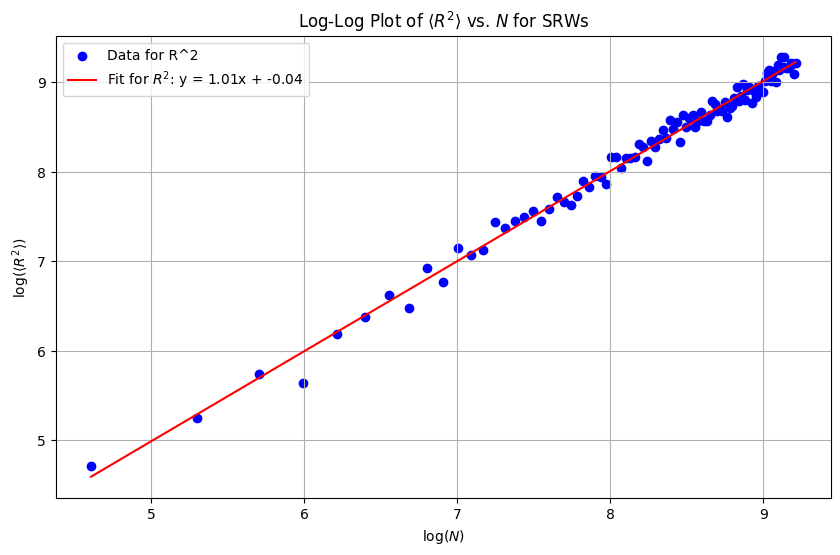

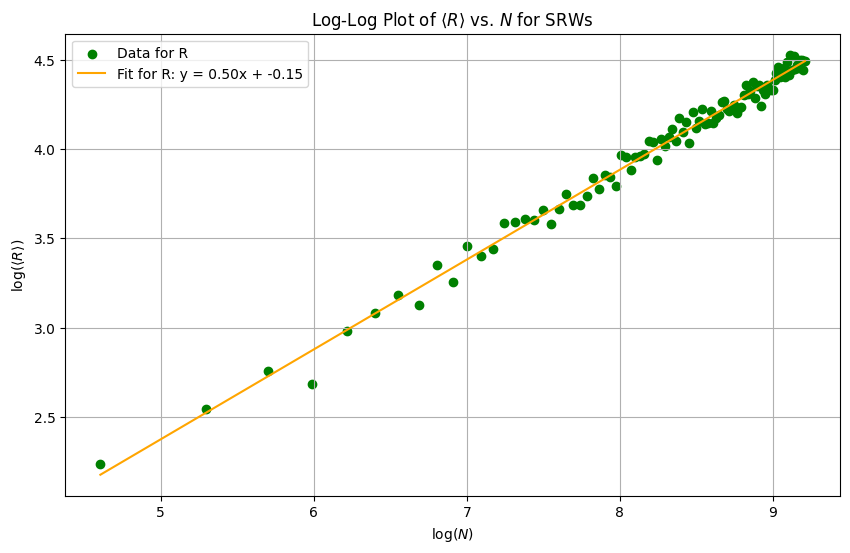

In [2]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 1. Load Data
data = np.loadtxt("random_walk_data.txt", delimiter=",", skiprows=1)
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2]  

# 2. Transform Data for R^2 vs N
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

# Transform Data for R vs N
log_R = np.log(R_values)

# 3. Fit a Linear Function for R^2 vs N
slope_R2, intercept_R2, _, _, _ = linregress(log_N, log_R2)

# Fit a Linear Function for R vs N
slope_R, intercept_R, _, _, _ = linregress(log_N, log_R)

# 4. Plot for R^2 vs N
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R2, label="Data for R^2", color="blue")
plt.plot(log_N, slope_R2*log_N + intercept_R2, label=f"Fit for $R^2$: y = {slope_R2:.2f}x + {intercept_R2:.2f}", color="red")
plt.title(r"Log-Log Plot of $\langle R^2 \rangle$ vs. $N$ for SRWs")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R^2 \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

# 5. Plot for R vs N
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R, label="Data for R", color="green")
plt.plot(log_N, slope_R*log_N + intercept_R, label=f"Fit for R: y = {slope_R:.2f}x + {intercept_R:.2f}", color="orange")
plt.title(r"Log-Log Plot of $\langle R \rangle$ vs. $N$ for SRWs")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R \rangle)$")
plt.legend()
plt.grid(True)
plt.show()


We see that the scaling factor for the log-log plot of $\langle RN^2 \rangle$ vs N is 1; which is what we would intuitively expect since we expect the $\langle RN^2 \rangle$ to equal N. Thus our simulation follows theoretical predictions perfectly in this case.

**Question 2.a)**

In this method, walks are generated that do not allow revisiting of previously visited sites. If a walk becomes self-intersecting, it is rejected. We make this more efficent and reduce the attrition rate by forcing the the walks to be non-reversing. This way we essentially make the set of our possible random walks smaller and increase the probability that a walk is a self-avoiding walk.

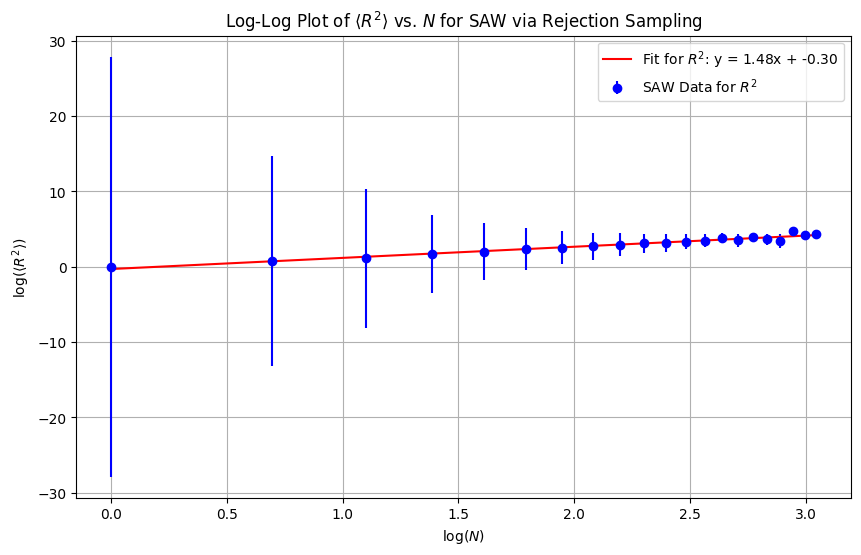

In [13]:
# 1. Load SAW Data

data = np.loadtxt("saw_data.txt", delimiter=",", skiprows=1)
#filtered_data = data[~np.isnan(data).any(axis=1)]
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2] 
Cn_values = np.float64(data[:, 3])



valid_indices = np.logical_and(N_values > 0, np.logical_and(R2_values > 0, R_values > 0))

N_values = N_values[valid_indices]
R2_values = R2_values[valid_indices]
R_values = R_values[valid_indices]
Cn_values = Cn_values[valid_indices]

rms_error_R2 = np.std(R2_values)
rms_error_R = np.std(R_values)

# 2. Transform Data for R^2 vs N
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

# Transform Data for R vs N
log_R = np.log(R_values)

# 3. Fit a Linear Function for R^2 vs N
slope_R2, intercept_R2, _, _, _ = linregress(log_N, log_R2)

# Fit a Linear Function for R vs N
slope_R, intercept_R, _, _, _ = linregress(log_N, log_R)

# 4. Plot for R^2 vs N
plt.figure(figsize=(10, 6))
plt.errorbar(log_N, log_R2, yerr=rms_error_R2 / R2_values, fmt='o', label="SAW Data for $R^2$", color="blue")
#plt.scatter(log_N, log_R2, label="SAW Data for $R^2$", color="blue")
plt.plot(log_N, slope_R2*log_N + intercept_R2, label=f"Fit for $R^2$: y = {slope_R2:.2f}x + {intercept_R2:.2f}", color="red")
plt.title(r"Log-Log Plot of $\langle R^2 \rangle$ vs. $N$ for SAW via Rejection Sampling")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R^2 \rangle)$")
plt.legend()
plt.grid(True)
plt.show()



We see that the scaling factor for $ \langle R^2 \rangle$ is approximately 1.5 which is larger than the random walk case. This shows that these self-avoiding walks grow faster with N than the RWs, namely because we expect them to be less compact due to the disallowing of visiting a point twice.

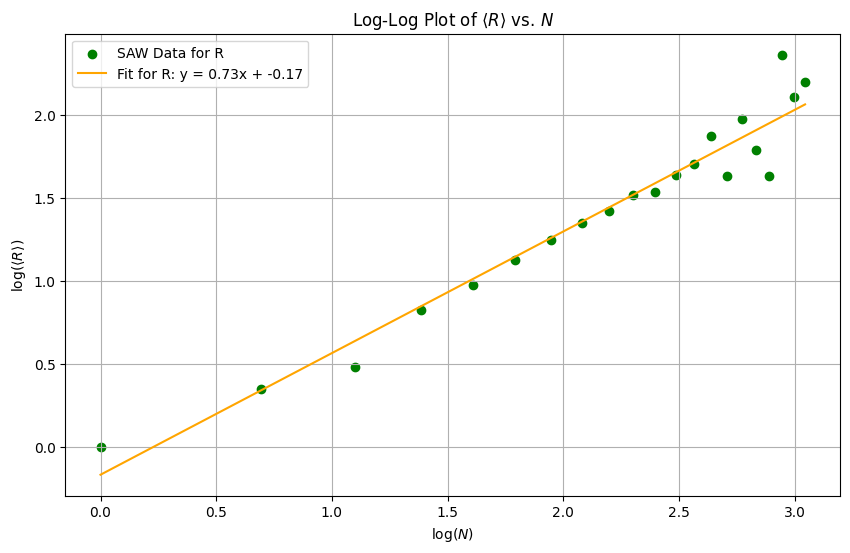

In [4]:
# 5. Plot for R vs N
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R, label="SAW Data for R", color="green")
plt.plot(log_N, slope_R*log_N + intercept_R, label=f"Fit for R: y = {slope_R:.2f}x + {intercept_R:.2f}", color="orange")
plt.title(r"Log-Log Plot of $\langle R \rangle$ vs. $N$")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

**Question 2.b)**

Next, we take a detour to investigate another property of 2D self-avoiding walks - the connective constant $\mu$. We know that $C_{N}^{\frac{1}{N}} \rightarrow \mu$ as $N \rightarrow \inf$ and that $\mu$ is roughly the number of available sites that the walker can move to at each step. This constant is crucial for understanding the number of possible SAWs for a given length
N. 

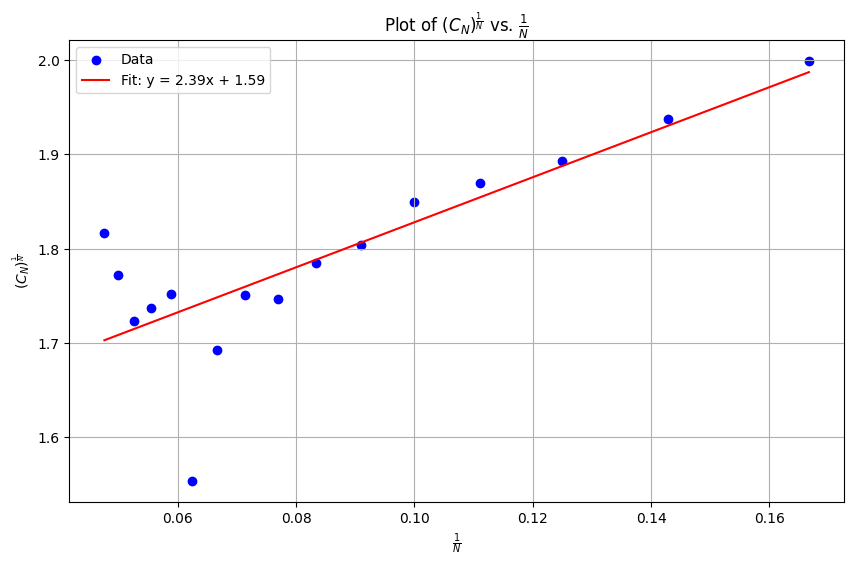

The y-intercept, which estimates the connective constant µ, is approximately 1.5891841054973048


In [5]:


Cn_values = Cn_values[5:]
N_values = N_values[5:]
cN_power_1_over_N = np.power(Cn_values, 1/N_values)

#Fit a line to (c_N)^(1/N) vs 1/N
slope, intercept, r_value, p_value, std_err = linregress(1/N_values, cN_power_1_over_N)

plt.figure(figsize=(10, 6))
plt.scatter(1/N_values, cN_power_1_over_N, label="Data", color="blue")
plt.plot(1/N_values, slope*(1/N_values) + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title(r"Plot of $(C_{N})^\frac{1}{N}$ vs. $\frac{1}{N}$")
plt.xlabel(r"$\frac{1}{N}$")
plt.ylabel(r"$(C_{N})^\frac{1}{N}$")
plt.legend()
plt.grid(True)
plt.show()

print(f"The y-intercept, which estimates the connective constant µ, is approximately {intercept}")


The plot of $ C_{N}^{\frac{1}{N}}$  versus $\frac{1}{N}$ shows a linear trend, suggesting that $\mu$ can be reliably estimated from the y-intercept. We know that $\mu$ is supposed to be approximately 2.6 for the 2D case, however we were not able to show that in this case either due to errors in generation of data, calculation of CN or the plotting of the data.

***Question 3*** 

Here we implement Myopic sampling. The walker chooses its next step uniformly from unvisited neighbors. If a walk gets stuck, the walk is rejected. 

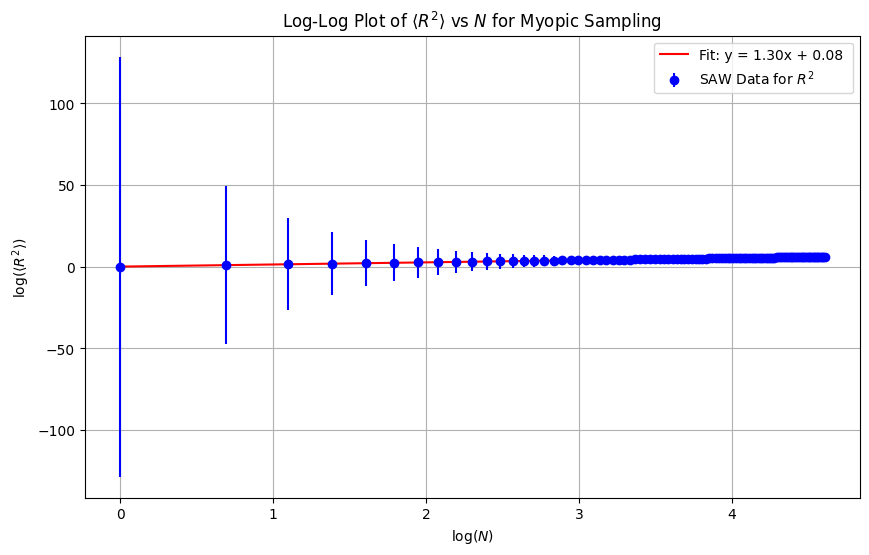

In [15]:
# 1. Load Data for Myopic Sampling
data = np.loadtxt("SAW_myopic_data.txt", delimiter=",", skiprows=1)
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2]

# 2. Filter out invalid entries
valid_indices = np.logical_and(N_values > 0, np.logical_and(R2_values > 0, R_values > 0))
N_values = N_values[valid_indices]
R2_values = R2_values[valid_indices]
R_values = R_values[valid_indices]

rms_error_R2 = np.std(R2_values)
rms_error_R = np.std(R_values)

# 3. Transform Data 
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

# 4. Fit a Linear Function
slope, intercept, _, _, _ = linregress(log_N, log_R2)


plt.figure(figsize=(10, 6))
#plt.scatter(log_N, log_R2, label="Data", color="blue")
plt.errorbar(log_N, log_R2, yerr=rms_error_R2 / R2_values, fmt='o', label="Data$", color="blue")
plt.plot(log_N, slope*log_N + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f} ", color="red")
plt.title(r"Log-Log Plot of $\langle R^2 \rangle$ vs $N$ for Myopic Sampling")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R^2 \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

#  Transform Data 
log_R = np.log(R_values)

# Fit a Linear Function 
slope, intercept, _, _, _ = linregress(log_N, log_R)


Evidently the scaling factor of  $\langle R^2 \rangle$ in this case is 1.3 which is smaller than the self-avoiding walks generated via rejection sampling. We see however that the data points agree with the line of best incredibly well. Furthermore, this method was far more efficient than the rejection sampling and was able to generate walks with $N=100$ steps quite easily; this improvement in computational efficiency is drastically important if we want to simulate longer walks. However, it is important to keep in mind that this method unfortunately introduces a bias. Coiled up configurations are more likely to be generated, this causes a bias for compact walks.

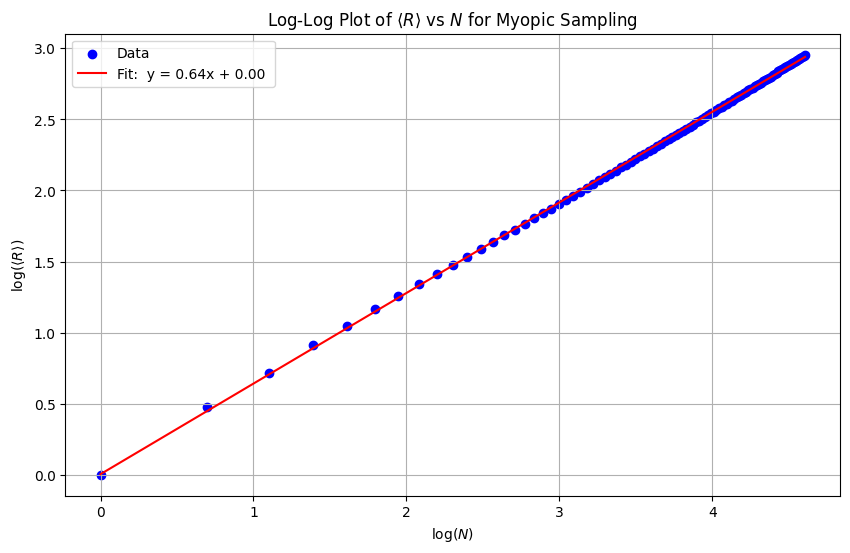

In [7]:
#  Transform Data for 
log_R = np.log(R_values)

# Fit linear funstion
slope, intercept, _, _, _ = linregress(log_N, log_R)


plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R, label="Data", color="blue")
plt.plot(log_N, slope*log_N + intercept, label=f"Fit:  y = {slope:.2f}x + {intercept:.2f} ", color="red")
plt.title(r"Log-Log Plot of $\langle R \rangle$ vs $N$ for Myopic Sampling")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

Rosenbluth Sampling is similar to the previous method except now we introduce weights in order to negate the bias that was introduced. This method uses self-normalizing importance sampling to generate the walks. Each step is weighted by the number of available directions, and the weights are used to calculate the weighted average of $ R^2 $. We hope that this can lead to the efficency of the previous method without the bias. 

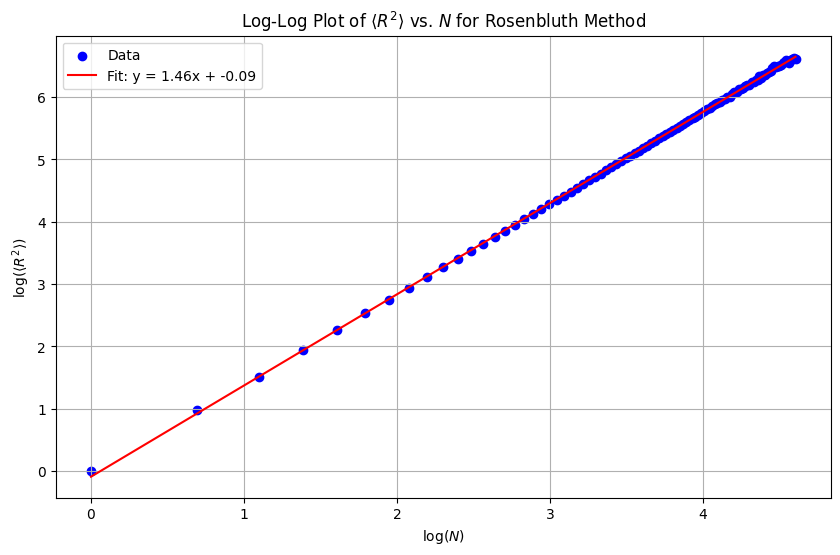

In [8]:

# Load Data
data = np.loadtxt("saw_rosenbluth_data.txt", delimiter=",", skiprows=1)
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2]

# Filter out invalid values (0 and NaN)
valid_indices = np.logical_and(N_values > 0, np.logical_and(R2_values > 0, R_values > 0))
N_values = N_values[valid_indices]
R2_values = R2_values[valid_indices]
R_values = R_values[valid_indices]

# Log-log plot for <R^2> vs N
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

slope, intercept, _, _, _ = linregress(log_N, log_R2)

plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R2, label="Data", color="blue")
plt.plot(log_N, slope*log_N + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title(r"Log-Log Plot of $\langle R^2 \rangle$ vs. $N$ for Rosenbluth Method")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R^2 \rangle)$")
plt.legend()
plt.grid(True)
plt.show()



The Rosenbluth method produces a scaling factor of approximately 1.5 which is the same as the rejection sampling method. This method was also able to quite easily produce walks of $N=100$ steps and with the efficency of the previous myopic sampling method. This scaling factor of 1.5 shows us that the bias for compact walks has been eliminated.

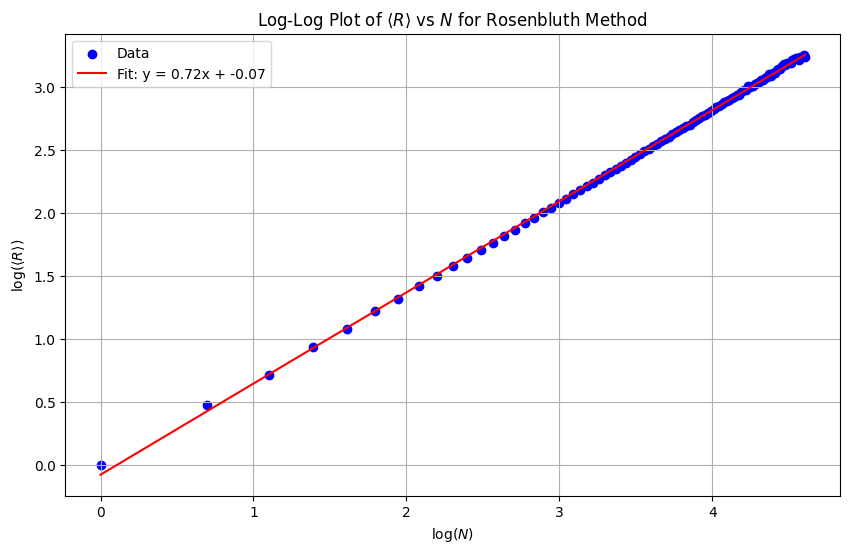

In [9]:
# Log-log plot for <R> vs N
log_R = np.log(R_values)

slope, intercept, _, _, _ = linregress(log_N, log_R)

plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R, label="Data", color="blue")
plt.plot(log_N, slope*log_N + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title(r"Log-Log Plot of $\langle R \rangle$ vs $N$ for Rosenbluth Method")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

**Question 4.a)**

In this question we once again implement rejection sampling, but instead of in 2D we do it for the 3D case. In this case the walker now has 6 options of direction to take, but due to the non-reversing property of these walks means that only 5 directions are possible.

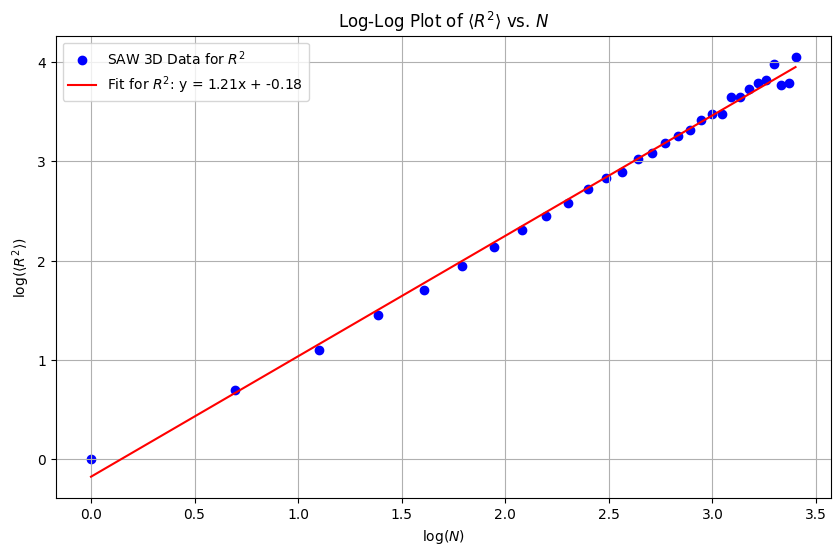

In [10]:
data = np.loadtxt("saw_3D_data.txt", delimiter=",", skiprows=1)
#filtered_data = data[~np.isnan(data).any(axis=1)]
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2] 
Cn_values = data[:, 3]

valid_indices = np.logical_and(N_values > 0, np.logical_and(R2_values > 0, R_values > 0))
N_values = N_values[valid_indices]
R2_values = R2_values[valid_indices]
R_values = R_values[valid_indices]
Cn_values = Cn_values[valid_indices]
#  Transform Data for R^2 vs N
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

# Transform Data for R vs N
log_R = np.log(R_values)

#  Fit a Linear Function for R^2 vs N
slope_R2, intercept_R2, _, _, _ = linregress(log_N, log_R2)

# Fit a Linear Function for R vs N
slope_R, intercept_R, _, _, _ = linregress(log_N, log_R)

#  Plot for R^2 vs N
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R2, label="SAW 3D Data for $R^2$", color="blue")
plt.plot(log_N, slope_R2*log_N + intercept_R2, label=f"Fit for $R^2$: y = {slope_R2:.2f}x + {intercept_R2:.2f}", color="red")
plt.title(r"Log-Log Plot of $\langle R^2 \rangle$ vs. $N$")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R^2 \rangle)$")
plt.legend()
plt.grid(True)
plt.show()



We see that the scaling factor of the self-rejecting sampling of non-reversing walks for the 3D case produces a scaling factor approximately equal to 1.2 . This means that the $\langle R^2 \rangle$ grows slower with $N$ than the 2D case, one can quite easily intuit that this is due to the increase in possiblities at each step. When there are only 4 possible directions (the 2D case), then walks that extend outwards are more likely to be valid walks. In the 3D case we have walks that are more compact due to the increased number of directions. Furthermore, the walks are more computationally intensive due to the larger data structures required for each trial which obviously require more memory to handle as well as there simply being more space for the walker to explore.

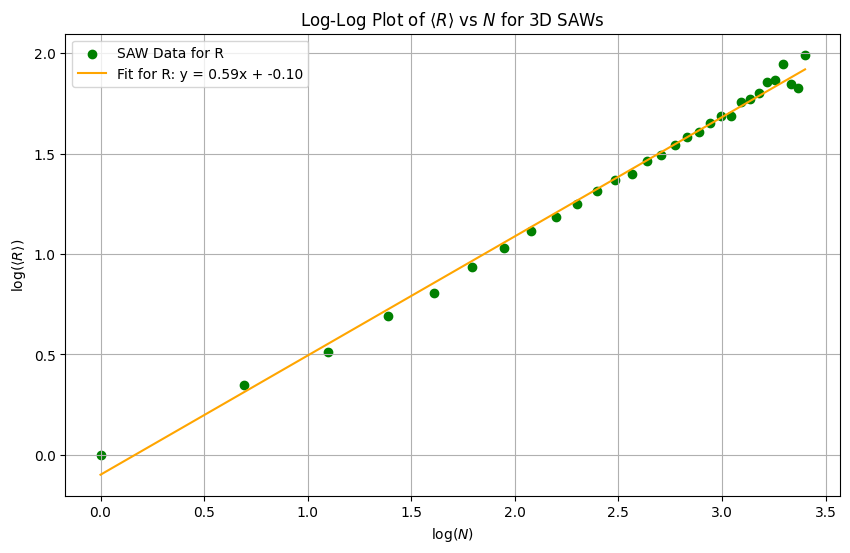

In [11]:
#  Plot for R vs N
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R, label="SAW Data for R", color="green")
plt.plot(log_N, slope_R*log_N + intercept_R, label=f"Fit for R: y = {slope_R:.2f}x + {intercept_R:.2f}", color="orange")
plt.title(r"Log-Log Plot of $\langle R \rangle$ vs $N$ for 3D SAWs")
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(\langle R \rangle)$")
plt.legend()
plt.grid(True)
plt.show()

**Question 4.b)**

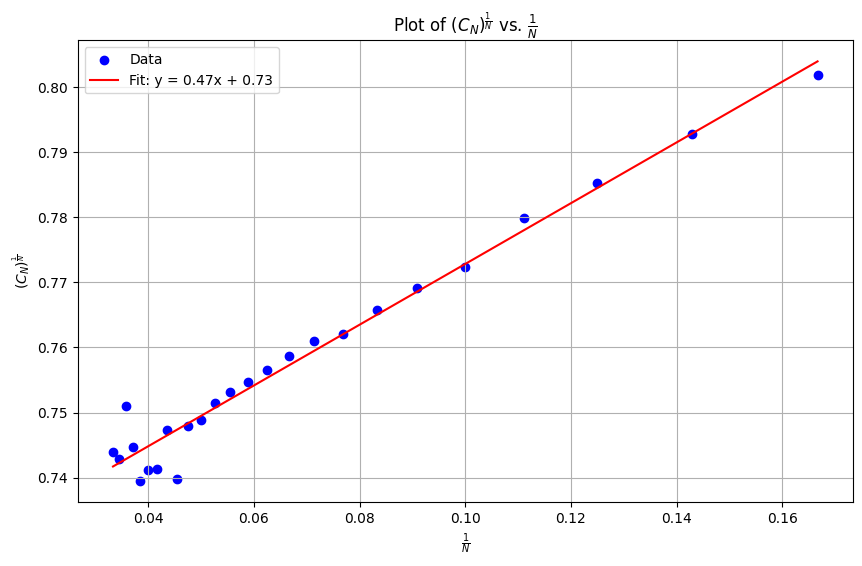

The y-intercept, which estimates the connective constant µ, is approximately 0.7261326320030564


In [12]:
#Compute (c_N)^(1/N) values
Cn_values = Cn_values[5:]
N_values = N_values[5:]
cN_power_1_over_N = np.power(Cn_values, 1/N_values)

#  Fit a line to (c_N)^(1/N) vs 1/N
slope, intercept, r_value, p_value, std_err = linregress(1/N_values, cN_power_1_over_N)


plt.figure(figsize=(10, 6))
plt.scatter(1/N_values, cN_power_1_over_N, label="Data", color="blue")
plt.plot(1/N_values, slope*(1/N_values) + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title(r"Plot of $(C_{N})^\frac{1}{N}$ vs. $\frac{1}{N}$")
plt.xlabel(r"$\frac{1}{N}$")
plt.ylabel(r"$(C_{N})^\frac{1}{N}$")
plt.legend()
plt.grid(True)
plt.show()

print(f"The y-intercept, which estimates the connective constant µ, is approximately {intercept}")

Once again we look at the connective constant $\mu$. Unfortunately, again we were unable to get the expected results. We expect $\mu = 4.6$.

***Conclusion***

Rejection sampling is easy to implement but computationally expensive; we also saw that this method is very inefficient in generating long walks as the likelihood of generating a SAW when N>20 becomes incredibly small. 
Myopic sampling was much faster than the rejection sampling, but is slightly more complicated. The Rosenbluth method is the most advanced of our methods and it provides both accuracy and effeciency. 
In summary for short walks rejection sampling is viable and ideal due to its simplicity; however for longer walks Rosenbluth is superior due to it being far less computationally intensive. This report highlights the importance of choosing the correct sampling method for the situation.